In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

%matplotlib notebook

In [5]:
class LSTM_Recommender:
    
    def __init__(self, n_input_features, num_layers):
        # Create the recurrent model
        # n_input_features: number of features of the input
        # num_units:        number of memory cells

        self.model = Sequential()
        #self.model.add(LSTM(num_units, input_shape=(1,n_input_features,1), batch_input_shape=(None,n_input_features,1), return_sequences=False))
        for _ in range(num_layers):
            self.model.add(LSTM(n_input_features, input_shape=(1,n_input_features), return_sequences=True))
        self.model.add(Dense(1))
        self.model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

        print(self.model.summary())

    def fit(self, X, Y, X_test, Y_test, epochs):
        self.history = self.model.fit(X, Y, epochs=epochs, validation_data=(X_test,Y_test))

    def predict(self, X):
        return self.model.predict(X)

    def plot_info(self):
        if self.history is not None:
            plt.figure()
            plt.plot(self.history.history['loss'])
            plt.show()

In [6]:
class GRU_Recommender:

    def __init__(self, n_input_features, num_layers):
        # Create the recurrent model
        # n_input_features: number of features of the input
        # num_units:        number of memory cells
        assert num_layers >= 1

        self.model = Sequential()
        for _ in range(num_layers):
            self.model.add(GRU(n_input_features, input_shape=(1,n_input_features), return_sequences=True))
        self.model.add(Dense(1))
        self.model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

        print(self.model.summary())

    def fit(self, X, Y, X_test, Y_test, epochs):
        self.history = self.model.fit(X, Y, epochs=epochs, validation_data=(X_test,Y_test))

    def predict(self, X):
        return self.model.predict(X)

    def plot_info(self):
        if self.history is not None:
            plt.figure()
            plt.plot(self.history.history['loss'])
            plt.show()

## Prepare a sample time serie

<IPython.core.display.Javascript object>


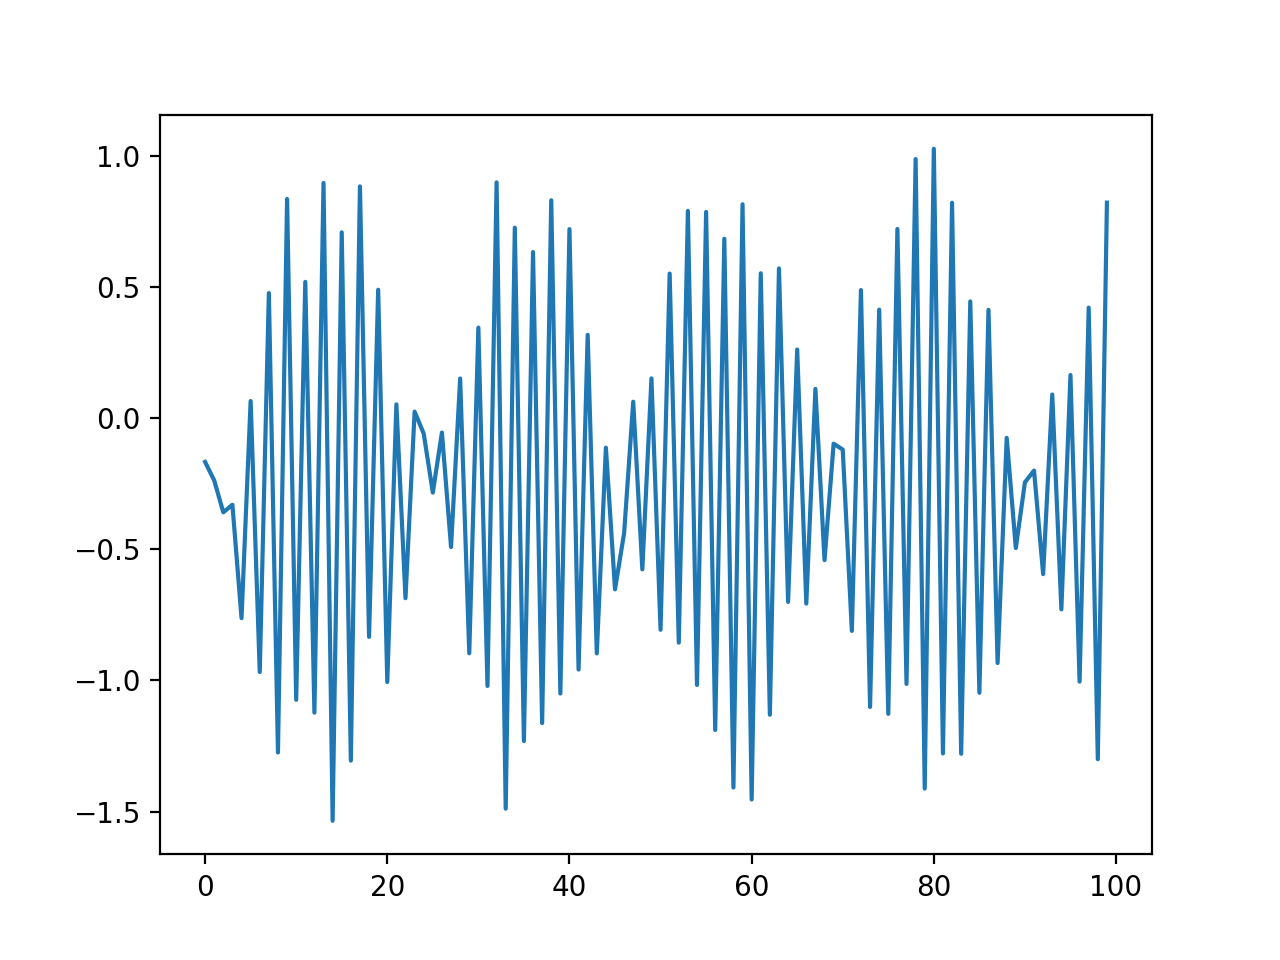

In [7]:
import numpy as np

num_samples = 100
w = 3
a = 3
b = 2

x1 = a * np.sin(w*np.arange(num_samples))
x2 = b * np.sin(w*np.arange(num_samples) + 3)
noise_ampl = b/4
x = x1 + x2 + (noise_ampl * np.random.random(num_samples) - noise_ampl)

plt.figure()
plt.plot(range(len(x)), x)
plt.show()

## Build the train and test set

In [8]:
dataset = []
for t in range(len(x)-1):
    dataset.append([[x[t]], [x[t+1]]])

dataset = np.array(dataset)
# should be (n_samples, n_features, 1)
#print('dataset shape: ', dataset.shape) #print(X[:10])
#print('Y shape: ', Y.shape) #print(Y[:10])
print(dataset.shape)
print(dataset[:5])

(99, 2, 1)
[[[-0.16720925]
  [-0.23757512]]

 [[-0.23757512]
  [-0.35932228]]

 [[-0.35932228]
  [-0.33040756]]

 [[-0.33040756]
  [-0.76268531]]

 [[-0.76268531]
  [ 0.06504139]]]


In [9]:
X = dataset[:,0,:]
X = X.reshape((X.shape[0],1,1))
X.shape

(99, 1, 1)

In [10]:
Y = dataset[:,1,:]
Y = Y.reshape((Y.shape[0],1,1))
Y.shape

(99, 1, 1)

In [11]:
X_train = X[:80]
Y_train = X[:80]
X_train.shape

(80, 1, 1)

In [12]:
X_test = X[-20:]
Y_test = Y[-20:]
X_test.shape

(20, 1, 1)

<IPython.core.display.Javascript object>


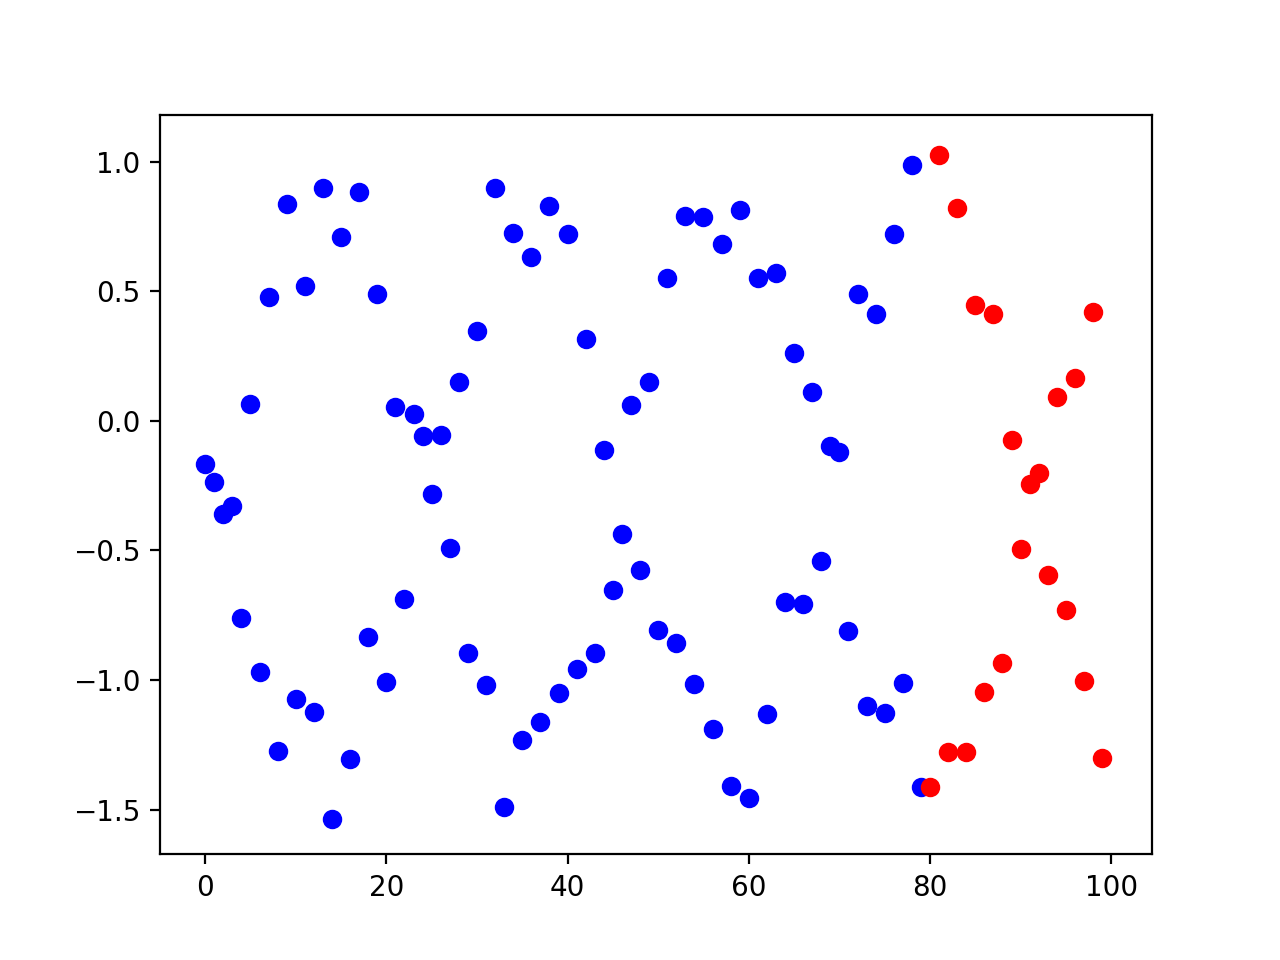

In [13]:
plt.figure()
plt.scatter(range(len(X_train)), X_train, c='b')
plt.scatter(range(len(X_train), len(X_train)+len(X_test)), X_test, c='r')
plt.show()

In [33]:
model = LSTM_Recommender(n_input_features=1, num_layers=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 1)              12        
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 1)              12        
_________________________________________________________________
dense_5 (Dense)              (None, 1, 1)              2         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
model.fit(X_train, Y_train, X_test, Y_test, epochs=400)
#model.plot_info()

Train on 80 samples, validate on 20 samples
Epoch 1/400
80/80 [==============================] - 4s 54ms/step - loss: 0.6827 - acc: 0.0000e+00 - val_loss: 0.6805 - val_acc: 0.0000e+00
Epoch 2/400
80/80 [==============================] - 0s 392us/step - loss: 0.6817 - acc: 0.0000e+00 - val_loss: 0.6804 - val_acc: 0.0000e+00
Epoch 3/400
80/80 [==============================] - 0s 380us/step - loss: 0.6811 - acc: 0.0000e+00 - val_loss: 0.6801 - val_acc: 0.0000e+00
Epoch 4/400
80/80 [==============================] - 0s 351us/step - loss: 0.6801 - acc: 0.0000e+00 - val_loss: 0.6798 - val_acc: 0.0000e+00
Epoch 5/400
80/80 [==============================] - 0s 358us/step - loss: 0.6792 - acc: 0.0000e+00 - val_loss: 0.6794 - val_acc: 0.0000e+00
Epoch 6/400
80/80 [==============================] - 0s 349us/step - loss: 0.6784 - acc: 0.0000e+00 - val_loss: 0.6790 - val_acc: 0.0000e+00
Epoch 7/400
80/80 [==============================] - 0s 357us/step - loss: 0.6774 - acc: 0.0000e+00 - val_loss:

80/80 [==============================] - 0s 357us/step - loss: 0.6279 - acc: 0.0000e+00 - val_loss: 0.6925 - val_acc: 0.0000e+00
Epoch 59/400
80/80 [==============================] - 0s 309us/step - loss: 0.6266 - acc: 0.0000e+00 - val_loss: 0.6932 - val_acc: 0.0000e+00
Epoch 60/400
80/80 [==============================] - 0s 322us/step - loss: 0.6256 - acc: 0.0000e+00 - val_loss: 0.6939 - val_acc: 0.0000e+00
Epoch 61/400
80/80 [==============================] - 0s 304us/step - loss: 0.6242 - acc: 0.0000e+00 - val_loss: 0.6947 - val_acc: 0.0000e+00
Epoch 62/400
80/80 [==============================] - 0s 310us/step - loss: 0.6231 - acc: 0.0000e+00 - val_loss: 0.6955 - val_acc: 0.0000e+00
Epoch 63/400
80/80 [==============================] - 0s 277us/step - loss: 0.6219 - acc: 0.0000e+00 - val_loss: 0.6963 - val_acc: 0.0000e+00
Epoch 64/400
80/80 [==============================] - 0s 295us/step - loss: 0.6207 - acc: 0.0000e+00 - val_loss: 0.6972 - val_acc: 0.0000e+00
Epoch 65/400
80/80 

80/80 [==============================] - 0s 322us/step - loss: 0.5284 - acc: 0.0000e+00 - val_loss: 0.7929 - val_acc: 0.0000e+00
Epoch 116/400
80/80 [==============================] - 0s 341us/step - loss: 0.5258 - acc: 0.0000e+00 - val_loss: 0.7955 - val_acc: 0.0000e+00
Epoch 117/400
80/80 [==============================] - 0s 303us/step - loss: 0.5233 - acc: 0.0000e+00 - val_loss: 0.7981 - val_acc: 0.0000e+00
Epoch 118/400
80/80 [==============================] - 0s 314us/step - loss: 0.5207 - acc: 0.0000e+00 - val_loss: 0.8009 - val_acc: 0.0000e+00
Epoch 119/400
80/80 [==============================] - 0s 303us/step - loss: 0.5180 - acc: 0.0000e+00 - val_loss: 0.8037 - val_acc: 0.0000e+00
Epoch 120/400
80/80 [==============================] - 0s 293us/step - loss: 0.5154 - acc: 0.0000e+00 - val_loss: 0.8066 - val_acc: 0.0000e+00
Epoch 121/400
80/80 [==============================] - 0s 319us/step - loss: 0.5126 - acc: 0.0000e+00 - val_loss: 0.8095 - val_acc: 0.0000e+00
Epoch 122/400

80/80 [==============================] - 0s 301us/step - loss: 0.3184 - acc: 0.0000e+00 - val_loss: 1.0061 - val_acc: 0.0000e+00
Epoch 173/400
80/80 [==============================] - 0s 296us/step - loss: 0.3133 - acc: 0.0000e+00 - val_loss: 1.0107 - val_acc: 0.0000e+00
Epoch 174/400
80/80 [==============================] - 0s 311us/step - loss: 0.3084 - acc: 0.0000e+00 - val_loss: 1.0153 - val_acc: 0.0000e+00
Epoch 175/400
80/80 [==============================] - 0s 283us/step - loss: 0.3037 - acc: 0.0000e+00 - val_loss: 1.0201 - val_acc: 0.0000e+00
Epoch 176/400
80/80 [==============================] - 0s 287us/step - loss: 0.2989 - acc: 0.0000e+00 - val_loss: 1.0251 - val_acc: 0.0000e+00
Epoch 177/400
80/80 [==============================] - 0s 301us/step - loss: 0.2943 - acc: 0.0000e+00 - val_loss: 1.0304 - val_acc: 0.0000e+00
Epoch 178/400
80/80 [==============================] - 0s 316us/step - loss: 0.2897 - acc: 0.0000e+00 - val_loss: 1.0358 - val_acc: 0.0000e+00
Epoch 179/400

80/80 [==============================] - 0s 314us/step - loss: 0.1946 - acc: 0.0000e+00 - val_loss: 1.1903 - val_acc: 0.0000e+00
Epoch 230/400
80/80 [==============================] - 0s 313us/step - loss: 0.1937 - acc: 0.0000e+00 - val_loss: 1.1919 - val_acc: 0.0000e+00
Epoch 231/400
80/80 [==============================] - 0s 285us/step - loss: 0.1928 - acc: 0.0000e+00 - val_loss: 1.1932 - val_acc: 0.0000e+00
Epoch 232/400
80/80 [==============================] - 0s 296us/step - loss: 0.1919 - acc: 0.0000e+00 - val_loss: 1.1945 - val_acc: 0.0000e+00
Epoch 233/400
80/80 [==============================] - 0s 306us/step - loss: 0.1909 - acc: 0.0000e+00 - val_loss: 1.1957 - val_acc: 0.0000e+00
Epoch 234/400
80/80 [==============================] - 0s 307us/step - loss: 0.1901 - acc: 0.0000e+00 - val_loss: 1.1970 - val_acc: 0.0000e+00
Epoch 235/400
80/80 [==============================] - ETA: 0s - loss: 0.1848 - acc: 0.0000e+0 - 0s 306us/step - loss: 0.1891 - acc: 0.0000e+00 - val_loss: 

80/80 [==============================] - 0s 311us/step - loss: 0.1525 - acc: 0.0000e+00 - val_loss: 1.2529 - val_acc: 0.0000e+00
Epoch 287/400
80/80 [==============================] - 0s 305us/step - loss: 0.1519 - acc: 0.0000e+00 - val_loss: 1.2539 - val_acc: 0.0000e+00
Epoch 288/400
80/80 [==============================] - 0s 310us/step - loss: 0.1511 - acc: 0.0000e+00 - val_loss: 1.2544 - val_acc: 0.0000e+00
Epoch 289/400
80/80 [==============================] - 0s 286us/step - loss: 0.1506 - acc: 0.0000e+00 - val_loss: 1.2550 - val_acc: 0.0000e+00
Epoch 290/400
80/80 [==============================] - 0s 315us/step - loss: 0.1500 - acc: 0.0000e+00 - val_loss: 1.2559 - val_acc: 0.0000e+00
Epoch 291/400
80/80 [==============================] - 0s 327us/step - loss: 0.1494 - acc: 0.0000e+00 - val_loss: 1.2567 - val_acc: 0.0000e+00
Epoch 292/400
80/80 [==============================] - 0s 294us/step - loss: 0.1488 - acc: 0.0000e+00 - val_loss: 1.2577 - val_acc: 0.0000e+00
Epoch 293/400

80/80 [==============================] - 0s 324us/step - loss: 0.1254 - acc: 0.0000e+00 - val_loss: 1.2707 - val_acc: 0.0000e+00
Epoch 344/400
80/80 [==============================] - 0s 283us/step - loss: 0.1251 - acc: 0.0000e+00 - val_loss: 1.2706 - val_acc: 0.0000e+00
Epoch 345/400
80/80 [==============================] - 0s 309us/step - loss: 0.1246 - acc: 0.0000e+00 - val_loss: 1.2712 - val_acc: 0.0000e+00
Epoch 346/400
80/80 [==============================] - 0s 298us/step - loss: 0.1241 - acc: 0.0000e+00 - val_loss: 1.2714 - val_acc: 0.0000e+00
Epoch 347/400
80/80 [==============================] - 0s 311us/step - loss: 0.1238 - acc: 0.0000e+00 - val_loss: 1.2719 - val_acc: 0.0000e+00
Epoch 348/400
80/80 [==============================] - 0s 292us/step - loss: 0.1234 - acc: 0.0000e+00 - val_loss: 1.2719 - val_acc: 0.0000e+00
Epoch 349/400
80/80 [==============================] - 0s 304us/step - loss: 0.1230 - acc: 0.0000e+00 - val_loss: 1.2717 - val_acc: 0.0000e+00
Epoch 350/400

80/80 [==============================] - 0s 307us/step - loss: 0.1035 - acc: 0.0000e+00 - val_loss: 1.2703 - val_acc: 0.0000e+00


In [35]:
predictions = model.predict(X_test)

<IPython.core.display.Javascript object>


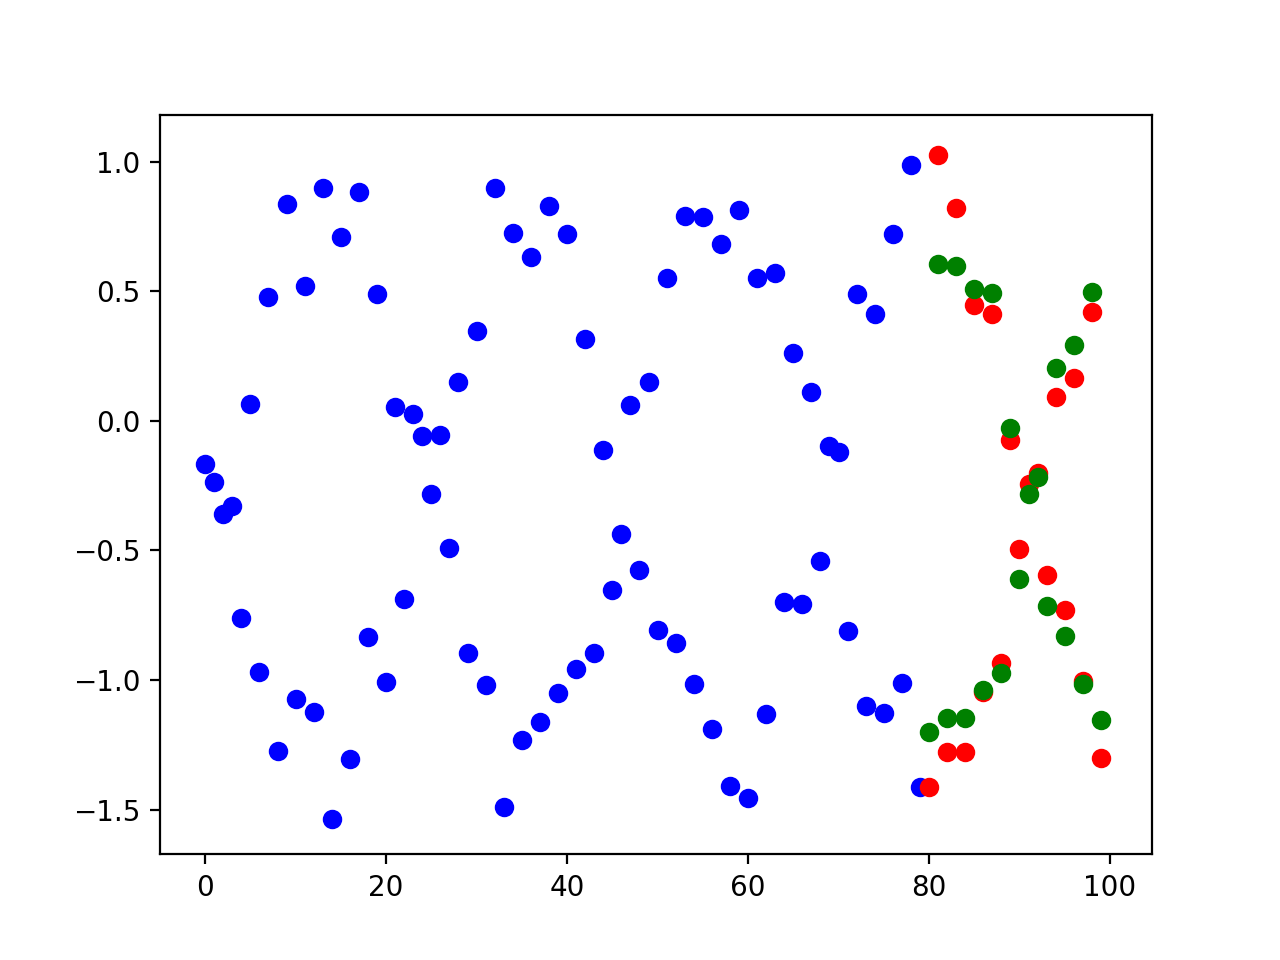

In [36]:
plt.figure()
plt.scatter(range(len(X_train)), X_train, c='b')
plt.scatter(range(len(X_train), len(X_train)+len(X_test)), X_test, c='r')

plt.scatter(range(len(X_train), len(X_train)+len(predictions)), predictions, c='g')

plt.show()

In [37]:
#print(predictions.flatten().shape)
#print(Y_test.flatten().shape)
print(mean_absolute_error(Y_test.flatten(), predictions.flatten()))

1.2703213665741497


## GRU Recommender

In [28]:
gru_model = GRU_Recommender(n_input_features=1, num_layers=4)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 1, 1)              9         
_________________________________________________________________
gru_5 (GRU)                  (None, 1, 1)              9         
_________________________________________________________________
gru_6 (GRU)                  (None, 1, 1)              9         
_________________________________________________________________
gru_7 (GRU)                  (None, 1, 1)              9         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 1)              2         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
gru_model.fit(X_train, Y_train, X_test, Y_test, epochs=50)
#model.plot_info()

Train on 80 samples, validate on 20 samples
Epoch 1/50
80/80 [==============================] - 6s 76ms/step - loss: 0.6977 - acc: 0.0000e+00 - val_loss: 0.6706 - val_acc: 0.0000e+00
Epoch 2/50
80/80 [==============================] - 0s 537us/step - loss: 0.6972 - acc: 0.0000e+00 - val_loss: 0.6700 - val_acc: 0.0000e+00
Epoch 3/50
80/80 [==============================] - 0s 504us/step - loss: 0.6965 - acc: 0.0000e+00 - val_loss: 0.6695 - val_acc: 0.0000e+00
Epoch 4/50
80/80 [==============================] - 0s 471us/step - loss: 0.6958 - acc: 0.0000e+00 - val_loss: 0.6689 - val_acc: 0.0000e+00
Epoch 5/50
80/80 [==============================] - 0s 475us/step - loss: 0.6951 - acc: 0.0000e+00 - val_loss: 0.6683 - val_acc: 0.0000e+00
Epoch 6/50
80/80 [==============================] - 0s 458us/step - loss: 0.6945 - acc: 0.0000e+00 - val_loss: 0.6678 - val_acc: 0.0000e+00
Epoch 7/50
80/80 [==============================] - 0s 451us/step - loss: 0.6938 - acc: 0.0000e+00 - val_loss: 0.6672

In [30]:
gru_preds = gru_model.predict(X_test)

<IPython.core.display.Javascript object>


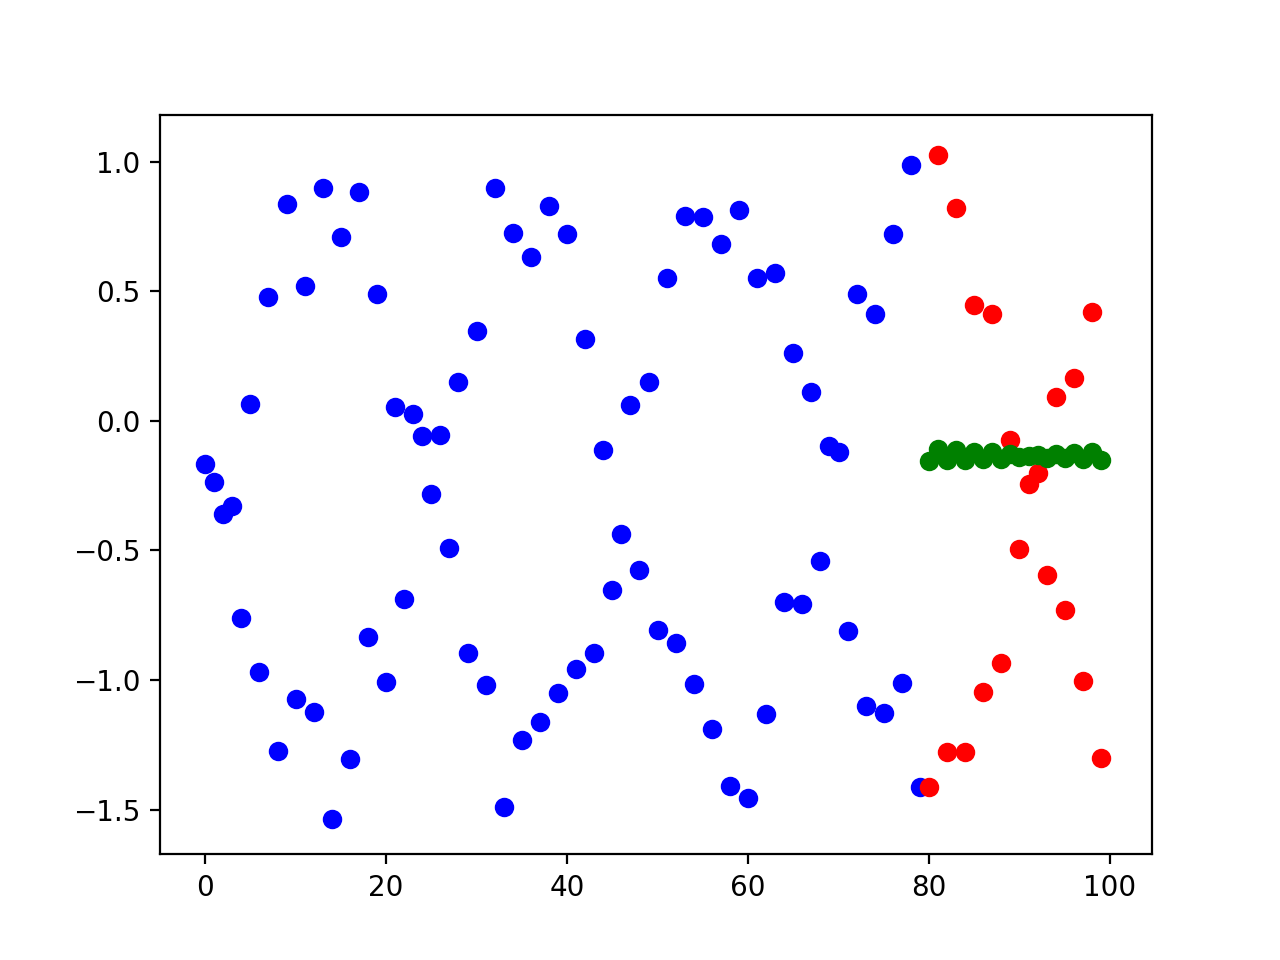

In [31]:
plt.figure()
plt.scatter(range(len(X_train)), X_train, c='b')
plt.scatter(range(len(X_train), len(X_train)+len(X_test)), X_test, c='r')

plt.scatter(range(len(X_train), len(X_train)+len(gru_preds)), gru_preds, c='g')

plt.show()

In [32]:
print(mean_absolute_error(Y_test.flatten(), gru_preds.flatten()))

0.6604160040337954
